# Implementación de una red LSTM sencilla para practicar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Intentamos leer el archivo, tal y como nos viene nos genera errores que debemos solventar con la r y luego especificando el encoding
df = pd.read_csv(r"DatosHistoricos_663461_A011Z65QRIO1.csv", sep = ";", encoding='latin-1')
df.head()

,Máximo,Mínimo,Media,Fecha máximo,Fecha mínimo,fecha
0,585,"483,28",545,2010-01-01 22:30:00,2010-01-01 00:00:00,2010-01-01 00:00:00
1,585,"532,12",556,2010-01-02 00:00:00,2010-01-02 21:45:00,2010-01-02 00:00:00
2,528,"450,8",498,2010-01-03 00:00:00,2010-01-03 23:30:00,2010-01-03 00:00:00
3,451,386,408,2010-01-04 00:00:00,2010-01-04 19:00:00,2010-01-04 00:00:00
4,418,386,405,2010-01-05 08:15:00,2010-01-05 00:00:00,2010-01-05 00:00:00


In [3]:
df.columns

Index(['Máximo', 'Mínimo            ', 'Media           ',
       'Fecha máximo                    ', 'Fecha mínimo', 'fecha         '],
      dtype='object')

In [4]:
df =df.drop(["Máximo",'Mínimo            ','Fecha máximo                    ','Fecha mínimo'], axis =1)

In [5]:
#modificamos los nombres de las columnas y eliminamos las que no necesitasmos
df.columns = ["Media","Fecha"]

In [6]:
#Convertimos a un formato de datatime la columna fecha
from datetime import datetime
df["Fecha"]= pd.to_datetime(df["Fecha"])

In [7]:
df =df.set_index("Fecha", append=False, inplace=False, verify_integrity=False)

In [8]:
#Debemos preprocesar los datos para 

In [9]:
#import plotly.express as px
#fig = px.line(df, x=df.index, y="Media",template = "plotly_dark",
 #             title="Caudal medio a su paso por Zaragoza")
#fig.show()

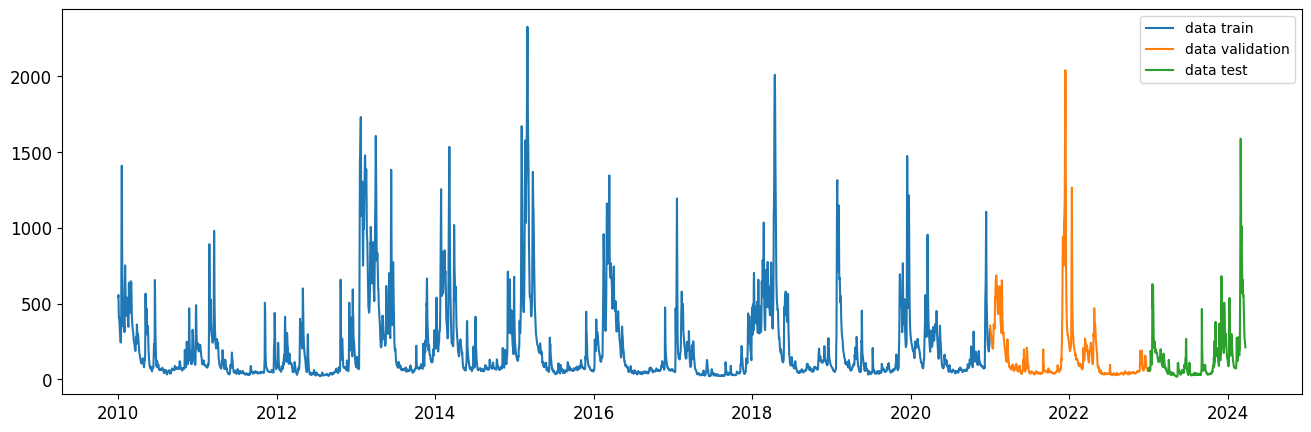

In [10]:
#Dibujamos la división para verificar que se encuentran de manera consecutiva
#Observamos que los parametros de tiempo han sido correctos
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(df[:"2020"], label="data train")
ax.plot(df["2021":"2022"], label="data validation")
ax.plot(df["2023":], label="data test")
plt.legend();

In [11]:
#Dividimos los datos
trainingSet = df[:"2020"]
validationSet = df["2021":"2023"]
testSet = df["2024":]


In [12]:
# Normaliza los datos
scaler = MinMaxScaler(feature_range=(0, 1))
trainingSetScaled = scaler.fit_transform(trainingSet[["Media"]])
validationSetScaled = scaler.fit_transform(validationSet[["Media"]])
testSetScaled = scaler.fit_transform(testSet[["Media"]])
#Tras las particiones, vamos a ver el tamaño de los diferentes set de datos
print(f"Tamaño datos entrenamiento: Train {trainingSetScaled.shape}")
print(f"Tamaño datos entrenamiento: Valid {validationSetScaled.shape}")
print(f"Tamaño datos entrenamiento: Test {testSetScaled.shape}")

Tamaño datos entrenamiento: Train (4018, 1)
Tamaño datos entrenamiento: Valid (1095, 1)
Tamaño datos entrenamiento: Test (83, 1)


In [13]:
trainingSetScaled

array([[0.22743056],
       [0.23220486],
       [0.20703125],
       ...,
       [0.08854167],
       [0.11588542],
       [0.13411458]])

In [14]:
#Creamos una función bucle para preparar el dataset con los datos.
def create_sequences(data, Steps):
    X = [] #Lista de listas, cada lísta interior va ser definido por Steps
    y = [] #Lista con las salidas (debemos definir cuantas salidas queremos) del conjunto de 30 datos
    for i in range(len(data) - Steps):
        X.append(data[i:i+Steps, 0]) # Guardariamos los datos de la posición 1 a 1+Steps #Los convertimos en numpy arrays para ruego hacer reshape
        y.append(data[i+Steps, 0]) #Guardariamos los datos de la posición 1+Steps #Los convertimos en numpy arrays para ruego hacer reshape
    return np.array(X), np.array(y)

#Dejar claro que X_train es forma matriz, y_train es forma array

In [15]:
#El entrenamiento de nuestra red neuronal recurrente va ser alimentado con bloques de datos
# Nosotros debemos especificar el tamaño de paquetes de datos de entrada y el tamaño de paquetes de salida en cada iteración
timeSteps =30 #Vamos a trabajar con 30 días de datos de entrada
#Preparamos los datos de entrenamiento del modelo
X_train, y_train = create_sequences(trainingSetScaled,timeSteps)
#Preparamos los datos de validacion del modelo
X_valid, y_valid = create_sequences(validationSetScaled,timeSteps)
#Preparamos los datos de test del modelo
X_test, y_test = create_sequences(testSetScaled,timeSteps)

In [16]:
#Debemos añadir una dimensión a el X_train, es necesario para trabajar con Keras
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #Es una matrizX_train en dos dimensiones que tenemos que pasarla a 3 dimensiones
X_valid = np.reshape(X_valid,(X_valid.shape[0],X_valid.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [17]:
#Parametros para la red neurona 
na = 20
output_shape = 1
input_shape =(X_train.shape[1],X_train.shape[2])

# Red SIMPLE RNN

Red SIMPLE RNN que cada 30 días anteriores de entrada, nos predice 1 día

In [18]:
RNN = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [19]:
#Compilación de la red
RNN.compile(loss="mse", optimizer="rmsprop",metrics=["mae"])
#entrenamiento y validación
historyRNN = RNN.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
125/125 [==============================] - 2s 6ms/step - loss: 0.0405 - mae: 0.1107 - val_loss: 0.0082 - val_mae: 0.0781
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0051 - mae: 0.0509 - val_loss: 0.0019 - val_mae: 0.0208
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0027 - mae: 0.0359 - val_loss: 0.0013 - val_mae: 0.0258
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0015 - mae: 0.0254 - val_loss: 9.2505e-04 - val_mae: 0.0184
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.0011 - mae: 0.0211 - val_loss: 0.0016 - val_mae: 0.0306
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 8.2460e-04 - mae: 0.0175 - val_loss: 5.9155e-04 - val_mae: 0.0124
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 7.5311e-04 - mae: 0.0157 - val_loss: 6.8409e-04 - val_mae: 0.0129
Epoch 8/20
125/125 [==============================] - 1s

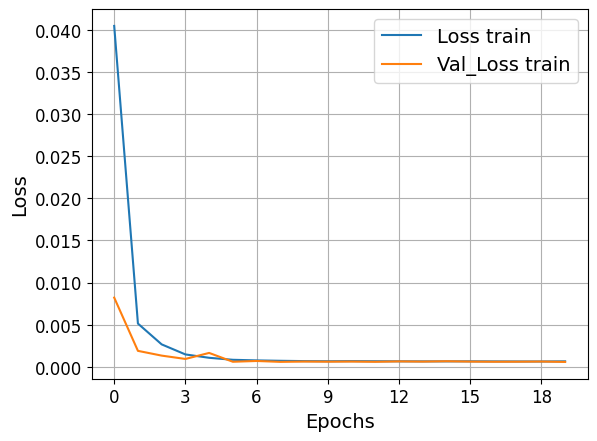

In [20]:
# Graficamos los resultados de modelo 
plt.plot(historyRNN.history["loss"],label="Loss train")
plt.plot(historyRNN.history["val_loss"],label="Val_Loss train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)      

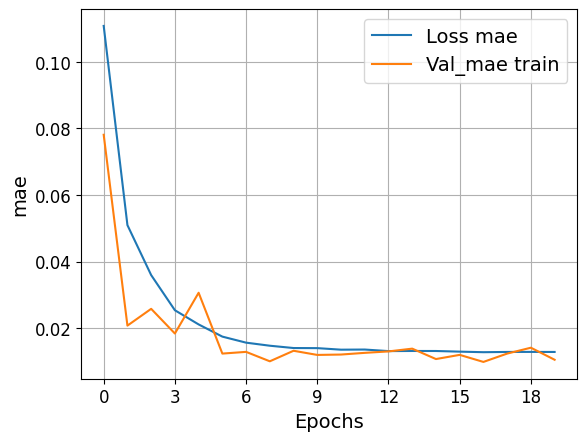

In [21]:
plt.plot(historyRNN.history["mae"],label="Loss mae")
plt.plot(historyRNN.history["val_mae"],label="Val_mae train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("mae")
plt.grid(True)      

In [22]:
realidad = scaler.inverse_transform(testSetScaled)

In [23]:
RNNpred = RNN.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [24]:
RNNpred = scaler.inverse_transform(RNNpred)

In [25]:
RNNpred = RNNpred.reshape(-1)
realidad = realidad.reshape(-1)

In [26]:

realidad= realidad[timeSteps-1:-1]

In [27]:
realidad

array([  86.,   81.,   78.,   82.,   74.,   81.,   80.,   79.,   77.,
         73.,   72.,  101.,  205.,  275.,  211.,  146.,  120.,  133.,
        151.,  272.,  278.,  211.,  182.,  166.,  158.,  158.,  179.,
        205.,  493.,  807., 1231., 1587., 1306., 1035.,  894., 1008.,
        885.,  746.,  634.,  566.,  601.,  655.,  548.,  557.,  543.,
        481.,  393.,  330.,  295.,  267.,  256.,  242.,  228.])

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,mean_absolute_percentage_error


test_mse_RNN = mean_squared_error(realidad, RNNpred)
test_rmse_RNN = np.sqrt(test_mse_RNN)  # RMSE es la raíz cuadrada del MSE
test_mae_RNN = mean_absolute_error(realidad, RNNpred)
test_mape_RNN = mean_absolute_percentage_error(realidad, RNNpred)

print(f"Testing RNN MSE: {test_mse_RNN:.4f}")
print(f"Testing RNN RMSE: {test_rmse_RNN:.4f}")
print(f"Testing RNN MAE: {test_mae_RNN:.4f}")
print(f"Testing RNN MAPE: {test_mape_RNN:.4f}%")  # Multiplicamos por 100 para obtener el porcentaje

Testing RNN MSE: 5064.8633
Testing RNN RMSE: 71.1679
Testing RNN MAE: 40.7416
Testing RNN MAPE: 0.0970%


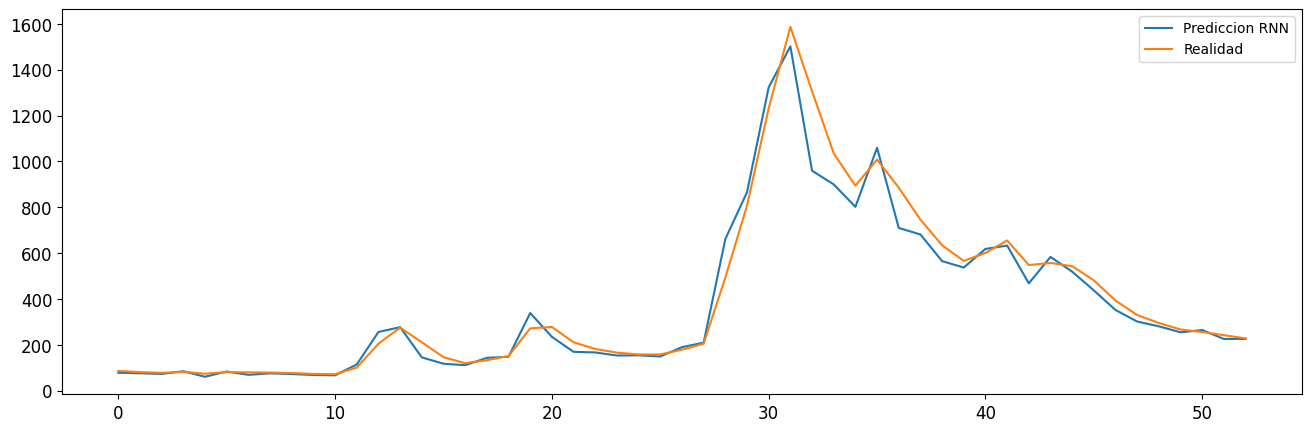

In [29]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(RNNpred, label="Prediccion RNN")
ax.plot(realidad , label="Realidad")# cada 30 días, nos predice 1 salida (0 al 29, empezamos en el día 29)
plt.legend();

# Red LSTM

Red LSTM que cada 30 días anteriores de entrada, nos predice 1 día de salida 

In [30]:
LSTM = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])

In [31]:
#Compilación de la red
LSTM.compile(loss="mse", optimizer="rmsprop")
#entrenamiento y validación
historyLSTM = LSTM.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
125/125 [==============================] - 3s 13ms/step - loss: 0.0057 - val_loss: 0.0032
Epoch 2/20
125/125 [==============================] - 1s 10ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 3/20
125/125 [==============================] - 1s 10ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 4/20
125/125 [==============================] - 1s 9ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 5/20
125/125 [==============================] - 1s 10ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 6/20
125/125 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 9.8446e-04
Epoch 7/20
125/125 [==============================] - 1s 10ms/step - loss: 0.0010 - val_loss: 6.6083e-04
Epoch 8/20
125/125 [==============================] - 1s 9ms/step - loss: 8.4449e-04 - val_loss: 8.0642e-04
Epoch 9/20
125/125 [==============================] - 1s 10ms/step - loss: 7.9287e-04 - val_loss: 5.3543e-04
Epoch 10/20
125/125 [==============================] - 1s 10ms/step -

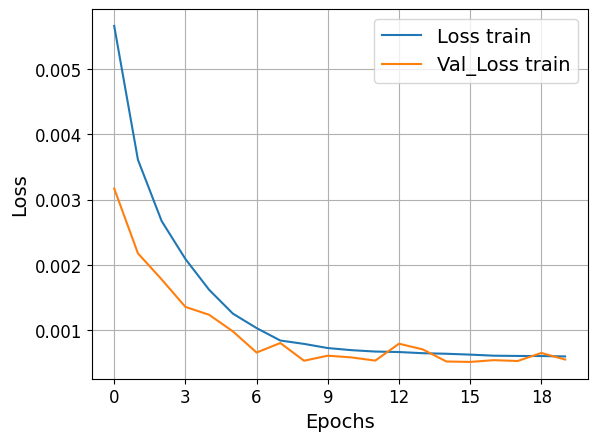

In [32]:
# Graficamos los resultados de modelo 
plt.plot(historyLSTM.history["loss"],label="Loss train")
plt.plot(historyLSTM.history["val_loss"],label="Val_Loss train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)      

In [33]:
LSTMpred = LSTM.predict(X_test)

2/2 [==============================] - 1s 4ms/step


In [34]:
LSTMpred = scaler.inverse_transform(LSTMpred)

In [35]:
LSTMpred = LSTMpred.reshape(-1)

In [36]:


# Calcular MSE
test_mse_LSTM = mean_squared_error(realidad, LSTMpred)

# Calcular RMSE
test_rmse_LSTM = np.sqrt(test_mse_LSTM)  # RMSE es la raíz cuadrada del MSE

# Calcular MAE
test_mae_LSTM = mean_absolute_error(realidad, LSTMpred)

# Calcular MAPE
test_mape_LSTM = mean_absolute_percentage_error(realidad,LSTMpred)

# Imprimir resultados
print(f"Testing LSTM MSE: {test_mse_LSTM:.4f}")
print(f"Testing LSTM RMSE: {test_rmse_LSTM:.4f}")
print(f"Testing LSTM MAE: {test_mae_LSTM:.4f}")
print(f"Testing LSTM MAPE: {test_mape_LSTM:.4f}%")

Testing LSTM MSE: 9472.9315
Testing LSTM RMSE: 97.3290
Testing LSTM MAE: 52.2615
Testing LSTM MAPE: 0.1236%


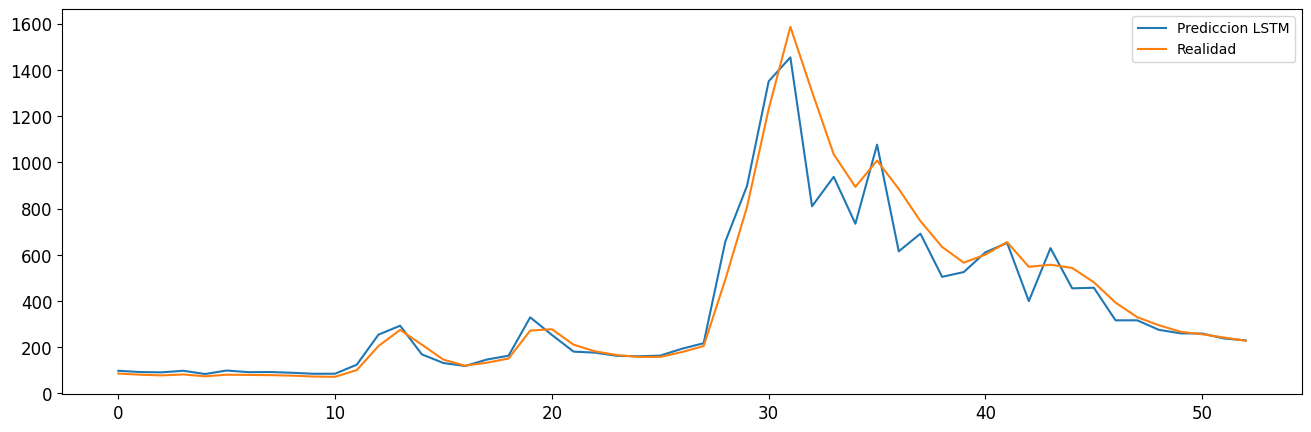

In [37]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(LSTMpred, label="Prediccion LSTM")
ax.plot(realidad , label="Realidad")# cada 30 días, nos predice 1 salida (0 al 29, empezamos en el día 29)
plt.legend();

# Red GRU

Red GRU que cada 30 días anteriores de entrada, nos predice 1 día

In [38]:
GRU = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20),
    keras.layers.Dense(1)
])

In [39]:
#Compilación de la red
GRU.compile(loss="mse", optimizer="adam")
#entrenamiento y validación
historyGRU = GRU.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
125/125 [==============================] - 4s 14ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 2/20
125/125 [==============================] - 1s 11ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 3/20
125/125 [==============================] - 1s 11ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 4/20
125/125 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 8.0331e-04
Epoch 5/20
125/125 [==============================] - 1s 11ms/step - loss: 9.1390e-04 - val_loss: 6.5230e-04
Epoch 6/20
125/125 [==============================] - 1s 11ms/step - loss: 7.6253e-04 - val_loss: 6.1581e-04
Epoch 7/20
125/125 [==============================] - 1s 10ms/step - loss: 6.6255e-04 - val_loss: 5.6741e-04
Epoch 8/20
125/125 [==============================] - 1s 10ms/step - loss: 6.3770e-04 - val_loss: 5.5732e-04
Epoch 9/20
125/125 [==============================] - 1s 11ms/step - loss: 6.1463e-04 - val_loss: 5.3032e-04
Epoch 10/20
125/125 [==========================

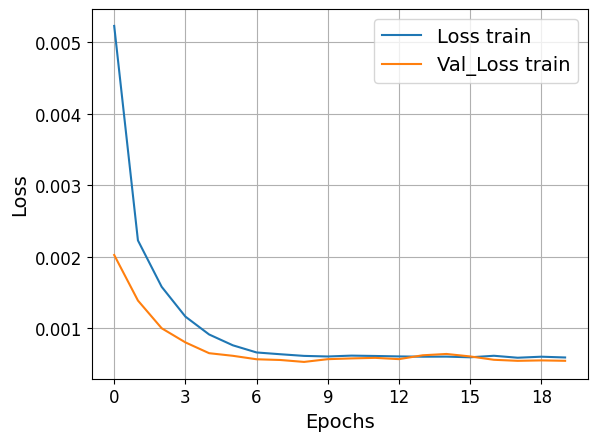

In [40]:
# Graficamos los resultados de modelo 
plt.plot(historyGRU.history["loss"],label="Loss train")
plt.plot(historyGRU.history["val_loss"],label="Val_Loss train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)   

In [41]:
GRUpred = GRU.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [42]:
GRUpred = scaler.inverse_transform(GRUpred)

In [43]:
GRUpred = GRUpred.reshape(-1)

In [44]:

# Calcular MSE
test_mse_GRU = mean_squared_error(realidad, GRUpred)

# Calcular RMSE
test_rmse_GRU = np.sqrt(test_mse_GRU)  # RMSE es la raíz cuadrada del MSE

# Calcular MAE
test_mae_GRU = mean_absolute_error(realidad, GRUpred)

# Calcular MAPE
test_mape_GRU = mean_absolute_percentage_error(realidad, GRUpred)

# Imprimir resultados
print(f"Testing GRU MSE: {test_mse_GRU:.4f}")
print(f"Testing GRU RMSE: {test_rmse_GRU:.4f}")
print(f"Testing GRU MAE: {test_mae_GRU:.4f}")
print(f"Testing GRU MAPE: {test_mape_GRU:.4f}%")

Testing GRU MSE: 8307.3832
Testing GRU RMSE: 91.1448
Testing GRU MAE: 44.4575
Testing GRU MAPE: 0.0872%


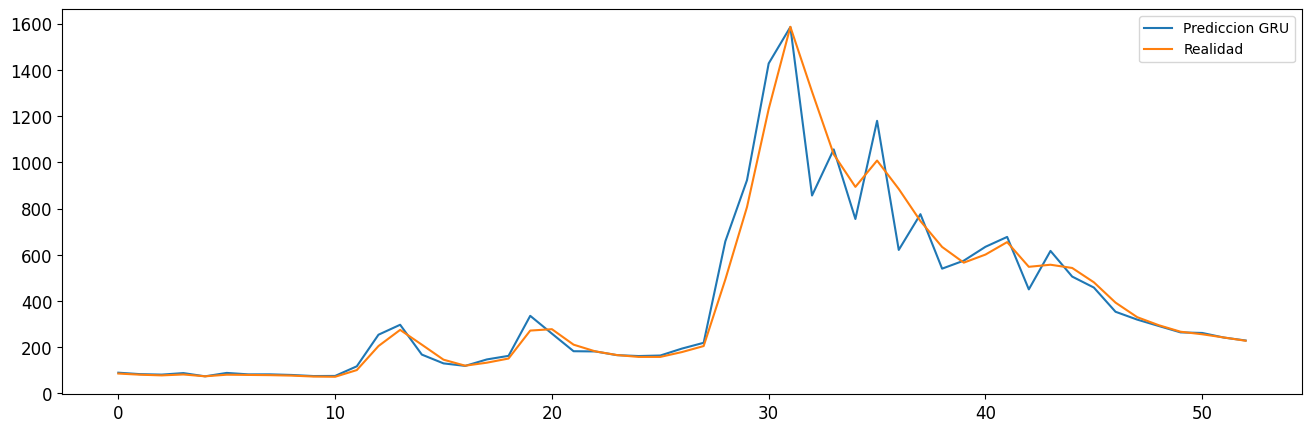

In [45]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(GRUpred, label="Prediccion GRU")
ax.plot(realidad, label="Realidad")# cada 30 días, nos predice 1 salida (0 al 29, empezamos en el día 29)
plt.legend();

# Comparativa final de los modelos RNN, LSTM y GRU

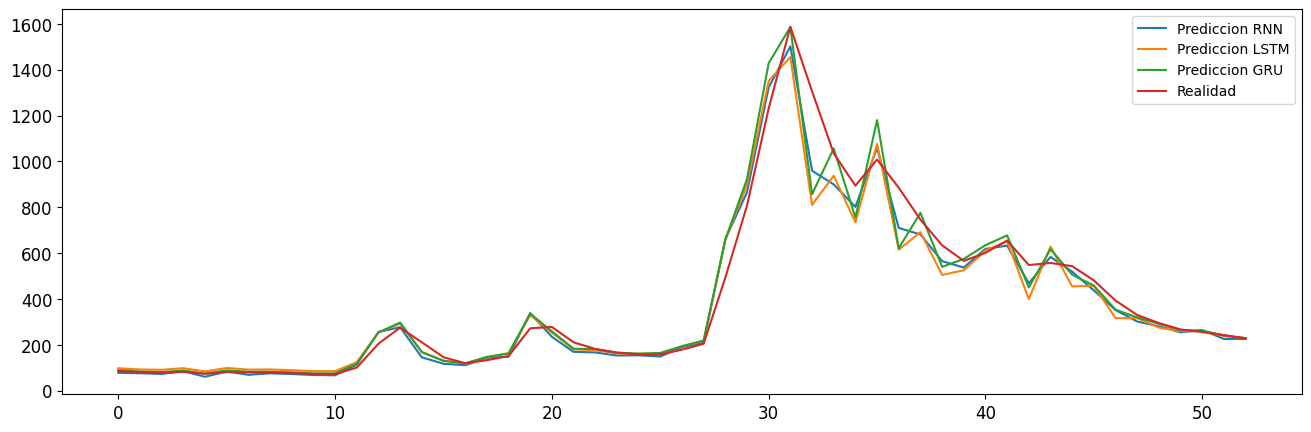

In [46]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(RNNpred, label="Prediccion RNN")
ax.plot(LSTMpred, label="Prediccion LSTM")
ax.plot(GRUpred, label="Prediccion GRU")
ax.plot(realidad, label="Realidad")
plt.legend();